# LSN Esercizi lezione 7
Gloria Senatore 931644

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Esercizio 7.1

#### Svolgimento

Il codice Monte Carlo NVT fornito simula il comportamento di particelle sottoposte a un potenziale di interazione alla Lennard-Jones. A differenza dell'esercitazione $4$, il sistema studiato non è microcanonico ma canonico e la sua evoluzione non è sviluppata tramite integrazione delle equazioni del moto bensì tramite algoritmo di Metropolis. La temperatura del bagno termico, $T^*$, è fissata.

Una mossa dell'algoritmo di Metropolis consiste nell'estrarre casualmente per $108$ volte una delle $108$ particelle, nel valutare la sua posizione, $\vec{x}_{old}$, nel proporre un cambiamento della sua posizione di ampiezza $\delta$ in ogni direzione e nell'accettare il cambiamento con probabilità $p = e^{\beta(E(\vec{x}_{old}) - E(\vec{x}_{new}))}$. Si sceglie $\delta$ in modo che l'accettanza sia circa del $50\%$. Il sistema viene lasciato equilibrare per $500$ step.

#### Risultati

Si riportano i risultati dei valori istantanei dell'energia potenziale per particella e pressione al variare degli $M = 5x10^5$ step per fase solida, liquida e gassosa.

##### Fase solida

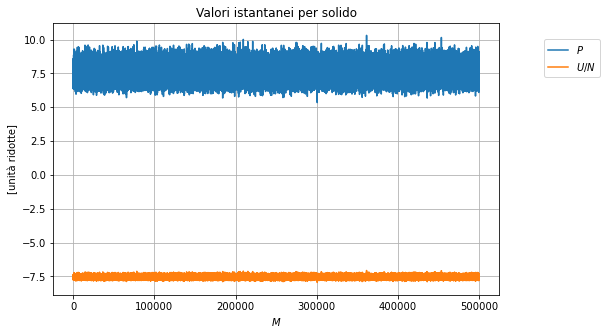

In [30]:
plt.figure(figsize=(8,5))
epot = np.loadtxt("7.1.ist_values_solid.dat", usecols=4)
pres = np.loadtxt("7.1.ist_values_solid.dat", usecols=7)
x = np.arange(epot.size)
plt.plot(x,pres,label='$P$')
plt.plot(x,epot,label='$U/N$')
plt.xlabel('$M$')
plt.ylabel('[unità ridotte]')
plt.title("Valori istantanei per solido")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

Per la fase solida, con $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$), si sceglie $\delta = 0.11$.

Sempre per il solido, si valutano le funzioni di autocorrelazione $\chi(t)$ dell'energia potenziale per particella e della pressione con i dati appena prodotti. La funzione di autocorrelazione dà indicazioni su quanto i dati relativi a due simulazioni Monte Carlo siano indipendenti tra loro. Se due misurazioni di proprietà del sistema distano tra loro pochi step Monte Carlo, ci si attende un'alta autocorrelazione. Viceversa, l'autocorrelazione dovrebbe tendere a zero per misurazioni distanti molti step.

La funzione di autocorrelazione della proprietà $f(t)$ è pari a: $$
\chi(t) = \dfrac{\frac{1}{M-t} \sum_{t'=0}^{M-t} f(t')f(t'+t) - \frac{1}{M-t} 
          \sum_{t'=0}^{M-t} f(t') \frac{1}{M-t} \sum_{t'=0}^{M-t} f(t'+t)}{\frac{1}{M} 
          \sum_{t'=0}^{M} f^2(t') - (\frac{1}{M} \sum_{t'=0}^{M} f(t'))^2}
$$
con $M$ fisso in questo caso, pari a $5x10^5$.

Si valuta la funzione $\chi(t)$ solo per i primi $100$ step perché il calcolo di tale funzione è molto oneroso.

In [19]:
M = 500000
chi1 = np.zeros(shape=(M))
epot1 = np.zeros(shape=(M))
epot2 = np.zeros(shape=(M))
epot3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        epot1[t] += epot[i]
        epot2[t] += epot[t+i]
        epot3[t] += epot[i]*epot[t+i]

In [20]:
epot4 = np.zeros(shape=(M))
epot5 = np.zeros(shape=(M))

for t in range (0,M):
    epot4[t] += epot[t]*epot[t]
    epot5[t] += epot[t]
    
for t in range (0,M):
    chi1[t] = ( 1/(M-t)*epot3[t] - 1/(M-t)*epot1[t] * 1/(M-t)*epot2[t] ) / ( 1/M*epot4[t] - (1/M*epot5[t])**2 )

In [21]:
chi2 = np.zeros(shape=(M))
pres1 = np.zeros(shape=(M))
pres2 = np.zeros(shape=(M))
pres3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        pres1[t] += pres[i]
        pres2[t] += pres[t+i]
        pres3[t] += pres[i]*pres[t+i]

In [22]:
pres4 = np.zeros(shape=(M))
pres5 = np.zeros(shape=(M))

for t in range (0,M):
    pres4[t] += pres[t]*pres[t]
    pres5[t] += pres[t]
    
for t in range (0,M):
    chi2[t] = ( 1/(M-t)*pres3[t] - 1/(M-t)*pres1[t] * 1/(M-t)*pres2[t] ) / ( 1/M*pres4[t] - (1/M*pres5[t])**2 )

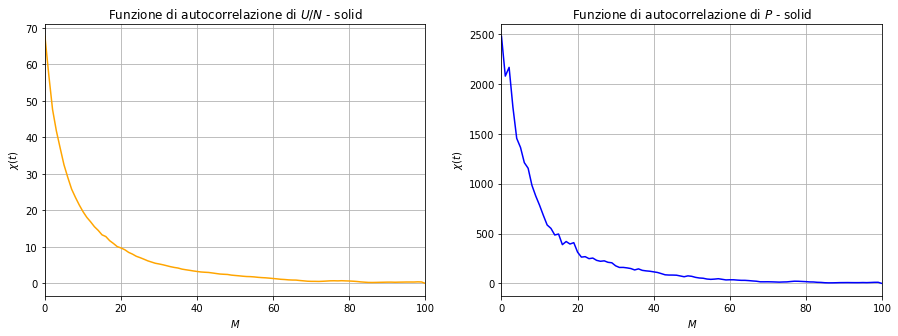

In [23]:
d = np.arange(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.plot(d,chi1,color='orange')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $U/N$ - solid")
ax.grid(True)

ax=ax2
ax.plot(d,chi2,color='b')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $P$ - solid")
ax.grid(True)

La funzione di autocorrelazione tende a zero come atteso all'aumentare del numero degli step. La valutazione di questa funzione è utile per la scelta della taglia del blocco da utilizzare nel metodo del *data blocking*. La taglia del blocco deve essere molto maggiore della lunghezza di correlazione $t_{c}$ definita come il numero di step per cui l'autocorrelazione è pari a $1/e$ del suo valore in $M=0$. Si osserva infatti che l'autocorrelazione può essere rappresentata dalla legge esponenziale: $$
\chi(t) \simeq e^{-t/t_{c}}
$$
In questo caso $t_{c}$ è circa $10$ step.

Si grafica ora l'andamento delle incertezze statistiche valutate con il seguente script, che utilizza gli stessi valori istantanei di prima, al variare della taglia $L$ di ciascun blocco con $M$ costante pari a $5x10^5$ step.

In [103]:
L = [10, 100, 500, 1000, 2500, 5000]
inc_epot = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    epot_ave = np.zeros(shape=(N))
    epot_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += epot[k]
        epot_ave[i] = sum1/l
        epot_ave2[i] = epot_ave[i]**2
    
    epot_prog = 0
    epot_prog2 = 0

    for j in range (N):
        epot_prog += epot_ave[j]
        epot_prog2 += epot_ave2[j]
    epot_prog /= N
    epot_prog2 /= N
    err_epot = math.sqrt((epot_prog2 - epot_prog**2)/(N-1))
    inc_epot[p] = err_epot
    p += 1

In [107]:
inc_pres = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    pres_ave = np.zeros(shape=(N))
    pres_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += pres[k]
        pres_ave[i] = sum1/l
        pres_ave2[i] = pres_ave[i]**2
    
    pres_prog = 0
    pres_prog2 = 0

    for j in range (N):
        pres_prog += pres_ave[j]
        pres_prog2 += pres_ave2[j]
    pres_prog /= N
    pres_prog2 /= N
    err_pres = math.sqrt((pres_prog2 - pres_prog**2)/(N-1))
    inc_pres[p] = err_pres
    p += 1

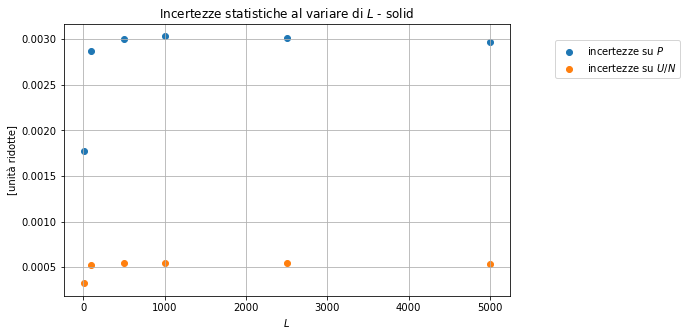

In [111]:
plt.figure(figsize=(8,5))

plt.scatter(L,inc_pres,label='incertezze su $P$')
plt.scatter(L,inc_epot,label='incertezze su $U/N$')
plt.xlabel('$L$')
plt.ylabel('[unità ridotte]')
plt.title("Incertezze statistiche al variare di $L$ - solid")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

Per valori piccoli di $L$ le incertezze vengono sottostimate. All'aumentare del numero di simulazioni in ogni blocco, le incertezze convergono correttamente ad un valore maggiore di quello stimato con $L$ piccolo.

##### Fase liquida

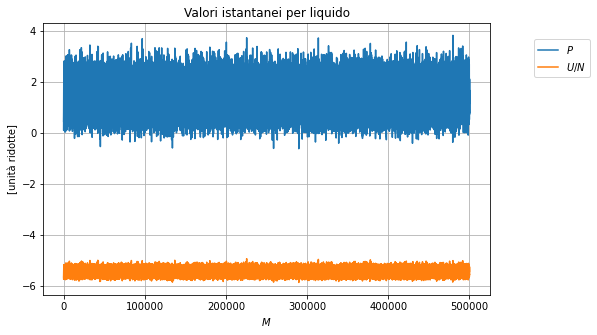

In [110]:
plt.figure(figsize=(8,5))
epot = np.loadtxt("7.1.ist_values_liquid.dat", usecols=4)
pres = np.loadtxt("7.1.ist_values_liquid.dat", usecols=7)
x = np.arange(epot.size)
plt.plot(x,pres,label='$P$')
plt.plot(x,epot,label='$U/N$')
plt.xlabel('$M$')
plt.ylabel('[unità ridotte]')
plt.title("Valori istantanei per liquido")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

Per il liquido, con $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$), si utilizza $\delta = 0.2$.

In [25]:
M = 500000
chi1 = np.zeros(shape=(M))
epot1 = np.zeros(shape=(M))
epot2 = np.zeros(shape=(M))
epot3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        epot1[t] += epot[i]
        epot2[t] += epot[t+i]
        epot3[t] += epot[i]*epot[t+i]

In [26]:
epot4 = np.zeros(shape=(M))
epot5 = np.zeros(shape=(M))

for t in range (0,M):
    epot4[t] += epot[t]*epot[t]
    epot5[t] += epot[t]
    
for t in range (0,M):
    chi1[t] = ( 1/(M-t)*epot3[t] - 1/(M-t)*epot1[t] * 1/(M-t)*epot2[t] ) / ( 1/M*epot4[t] - (1/M*epot5[t])**2 )

In [27]:
chi2 = np.zeros(shape=(M))
pres1 = np.zeros(shape=(M))
pres2 = np.zeros(shape=(M))
pres3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        pres1[t] += pres[i]
        pres2[t] += pres[t+i]
        pres3[t] += pres[i]*pres[t+i]

In [28]:
pres4 = np.zeros(shape=(M))
pres5 = np.zeros(shape=(M))

for t in range (0,M):
    pres4[t] += pres[t]*pres[t]
    pres5[t] += pres[t]
    
for t in range (0,M):
    chi2[t] = ( 1/(M-t)*pres3[t] - 1/(M-t)*pres1[t] * 1/(M-t)*pres2[t] ) / ( 1/M*pres4[t] - (1/M*pres5[t])**2 )

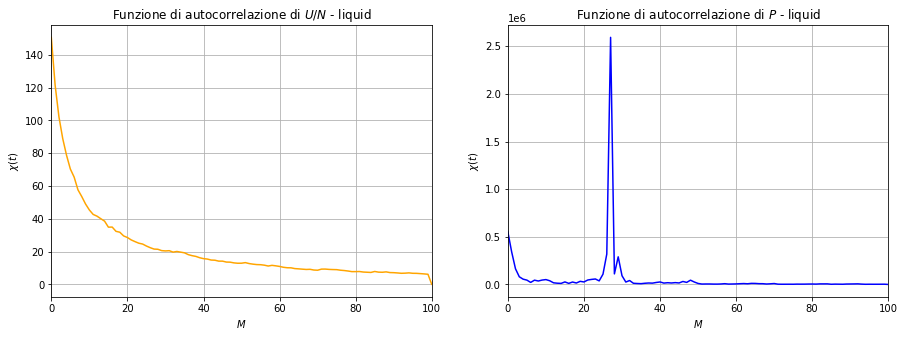

In [29]:
d = np.arange(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.plot(d,chi1,color='orange')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $U/N$ - liquid")
ax.grid(True)

ax=ax2
ax.plot(d,chi2,color='b')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $P$ - liquid")
ax.grid(True)

La funzione di autocorrelazione per l'energia potenziale mostra una decrescita leggermente meno rapida rispetto a quella del solido. La funzione di autocorrelazione per la pressione presenta un curioso picco poco prima dei $30$ step.

In [112]:
L = [10, 100, 500, 1000, 2500, 5000]
inc_epot = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    epot_ave = np.zeros(shape=(N))
    epot_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += epot[k]
        epot_ave[i] = sum1/l
        epot_ave2[i] = epot_ave[i]**2
    
    epot_prog = 0
    epot_prog2 = 0

    for j in range (N):
        epot_prog += epot_ave[j]
        epot_prog2 += epot_ave2[j]
    epot_prog /= N
    epot_prog2 /= N
    err_epot = math.sqrt((epot_prog2 - epot_prog**2)/(N-1))
    inc_epot[p] = err_epot
    p += 1

In [113]:
inc_pres = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    pres_ave = np.zeros(shape=(N))
    pres_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += pres[k]
        pres_ave[i] = sum1/l
        pres_ave2[i] = pres_ave[i]**2
    
    pres_prog = 0
    pres_prog2 = 0

    for j in range (N):
        pres_prog += pres_ave[j]
        pres_prog2 += pres_ave2[j]
    pres_prog /= N
    pres_prog2 /= N
    err_pres = math.sqrt((pres_prog2 - pres_prog**2)/(N-1))
    inc_pres[p] = err_pres
    p += 1

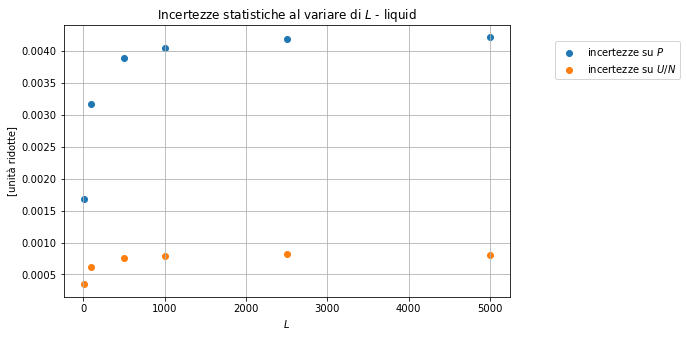

In [114]:
plt.figure(figsize=(8,5))

plt.scatter(L,inc_pres,label='incertezze su $P$')
plt.scatter(L,inc_epot,label='incertezze su $U/N$')
plt.xlabel('$L$')
plt.ylabel('[unità ridotte]')
plt.title("Incertezze statistiche al variare di $L$ - liquid")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

Anche in questo caso, all'aumentare della taglia del blocco le incertezze aumentano e convergono ad un certo valore.

##### Fase gassosa

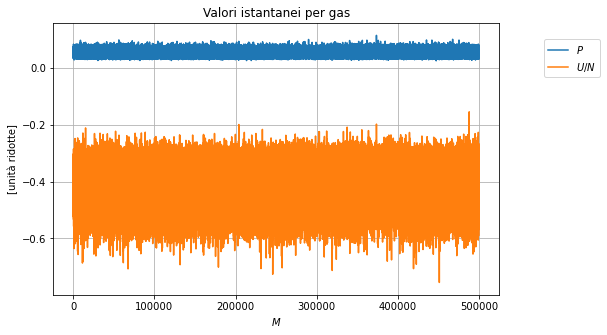

In [115]:
plt.figure(figsize=(8,5))
epot = np.loadtxt("7.1.ist_values_gas.dat", usecols=4)
pres = np.loadtxt("7.1.ist_values_gas.dat", usecols=7)
x = np.arange(epot.size)
plt.plot(x,pres,label='$P$')
plt.plot(x,epot,label='$U/N$')
plt.xlabel('$M$')
plt.ylabel('[unità ridotte]')
plt.title("Valori istantanei per gas")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

Per la fase gassosa, avente $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$), si osserva che, essendo il gas molto diluito, una mossa con un $\delta$ molto grande viene comunque accettata e, a causa delle condizioni al bordo periodiche, è inutile assegnare un valore di $\delta$ maggiore di metà lunghezza del box di simulazione, pari a circa $6.5$ in unità ridotte. Si sceglie appunto $\delta = 6.5$ con cui si ha un'accettanza del $60\%$.

In [12]:
M = 500000
chi1 = np.zeros(shape=(M))
epot1 = np.zeros(shape=(M))
epot2 = np.zeros(shape=(M))
epot3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        epot1[t] += epot[i]
        epot2[t] += epot[t+i]
        epot3[t] += epot[i]*epot[t+i]

In [13]:
epot4 = np.zeros(shape=(M))
epot5 = np.zeros(shape=(M))

for t in range (0,M):
    epot4[t] += epot[t]*epot[t]
    epot5[t] += epot[t]
    
for t in range (0,M):
    chi1[t] = ( 1/(M-t)*epot3[t] - 1/(M-t)*epot1[t] * 1/(M-t)*epot2[t] ) / ( 1/M*epot4[t] - (1/M*epot5[t])**2 )

In [14]:
chi2 = np.zeros(shape=(M))
pres1 = np.zeros(shape=(M))
pres2 = np.zeros(shape=(M))
pres3 = np.zeros(shape=(M))

for t in range (0, 100): 
    for i in range(0, M-t):
        pres1[t] += pres[i]
        pres2[t] += pres[t+i]
        pres3[t] += pres[i]*pres[t+i]

In [15]:
pres4 = np.zeros(shape=(M))
pres5 = np.zeros(shape=(M))

for t in range (0,M):
    pres4[t] += pres[t]*pres[t]
    pres5[t] += pres[t]
    
for t in range (0,M):
    chi2[t] = ( 1/(M-t)*pres3[t] - 1/(M-t)*pres1[t] * 1/(M-t)*pres2[t] ) / ( 1/M*pres4[t] - (1/M*pres5[t])**2 )

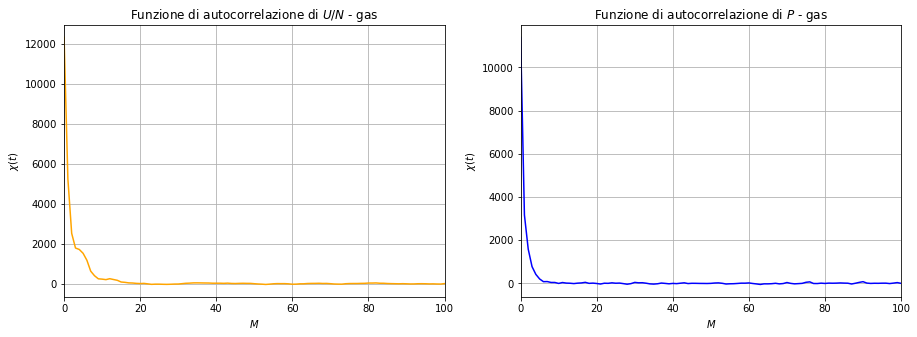

In [16]:
d = np.arange(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax=ax1
ax.plot(d,chi1,color='orange')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $U/N$ - gas")
ax.grid(True)

ax=ax2
ax.plot(d,chi2,color='b')
ax.set_xlabel('$M$')
ax.set_xlim(0,100)
ax.set_ylabel(r'$\chi(t)$')
ax.set_title("Funzione di autocorrelazione di $P$ - gas")
ax.grid(True)

Le funzioni di autocorrelazione del gas sia per energia potenziale che per pressione decadono molto rapidamente a zero.

In [116]:
L = [10, 100, 500, 1000, 2500, 5000]
inc_epot = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    epot_ave = np.zeros(shape=(N))
    epot_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += epot[k]
        epot_ave[i] = sum1/l
        epot_ave2[i] = epot_ave[i]**2
    
    epot_prog = 0
    epot_prog2 = 0

    for j in range (N):
        epot_prog += epot_ave[j]
        epot_prog2 += epot_ave2[j]
    epot_prog /= N
    epot_prog2 /= N
    err_epot = math.sqrt((epot_prog2 - epot_prog**2)/(N-1))
    inc_epot[p] = err_epot
    p += 1

In [117]:
inc_pres = np.zeros(shape=6)
p = 0
for l in L:
    N = int(M/l)
    pres_ave = np.zeros(shape=(N))
    pres_ave2 = np.zeros(shape=(N))
    for i in range(N):
        sum1 = 0
        for j in range (l):
            k = j+i*l
            sum1 += pres[k]
        pres_ave[i] = sum1/l
        pres_ave2[i] = pres_ave[i]**2
    
    pres_prog = 0
    pres_prog2 = 0

    for j in range (N):
        pres_prog += pres_ave[j]
        pres_prog2 += pres_ave2[j]
    pres_prog /= N
    pres_prog2 /= N
    err_pres = math.sqrt((pres_prog2 - pres_prog**2)/(N-1))
    inc_pres[p] = err_pres
    p += 1

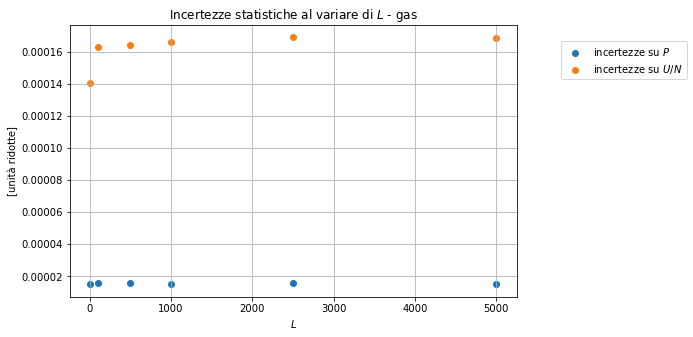

In [118]:
plt.figure(figsize=(8,5))

plt.scatter(L,inc_pres,label='incertezze su $P$')
plt.scatter(L,inc_epot,label='incertezze su $U/N$')
plt.xlabel('$L$')
plt.ylabel('[unità ridotte]')
plt.title("Incertezze statistiche al variare di $L$ - gas")
plt.grid(True)
plt.legend(loc=(1.1, 0.8), frameon=True)
plt.show()

### Esercizio 7.2

#### Svolgimento

Viene valutata la funzione di distribuzione radiale, $g(r)$, con $r$ compreso tra $0$ e metà del box di simulazione, per via delle condizioni al bordo periodiche. $g(r)$ dà informazioni su quale sia la probabilità di trovare una particella a distanza $r$ rispetto ad un'altra posta nell'origine, rispetto ad un gas ideale.

Si divide la lunghezza di metà box di simulazione in $100$ bin e, presa una particella, si aumenta di due il bin relativo ad $r$ quando un'altra particella dista dalla prima di una distanza compresa tra $r$ e $r+dr$, con $dr$ pari a metà box di simulazione diviso $100$. Si divide poi ciascun bin per $\rho N \frac{4\pi}{3}[(r+dr)^3 - r^3]$, $\rho$ densità e $N$ numero di particelle (sempre $108$ in questo caso).

#### Risultati

Per valutare la qualità dei risultati di $g(r)$, si eseguono delle veloci simulazioni con $100$ blocchi e $100$ step per blocco.

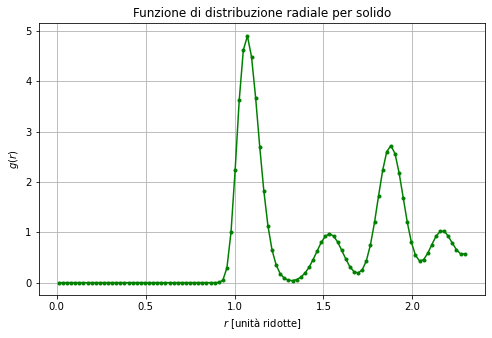

In [52]:
plt.figure(figsize=(8,5))
r = np.loadtxt("output.gave_solid.0", usecols=0)
g = np.loadtxt("output.gave_solid.0", usecols=1)
err_g = np.loadtxt("output.gave_solid.0", usecols=2)

plt.errorbar(r,g,yerr=err_g, color='green', marker='.')
plt.xlabel('$r$ [unità ridotte]')
plt.ylabel('$g(r)$')
plt.title("Funzione di distribuzione radiale per solido")
plt.grid(True)
plt.show()

A causa del core repulsivo del potenziale, una particella non può distare meno di un certo valore da quella posta nell'origine. Ciò viene osservato infatti nel grafico, oltre ai picchi corrispondenti alle shell dei primi, secondi, terzi e quarti vicini.

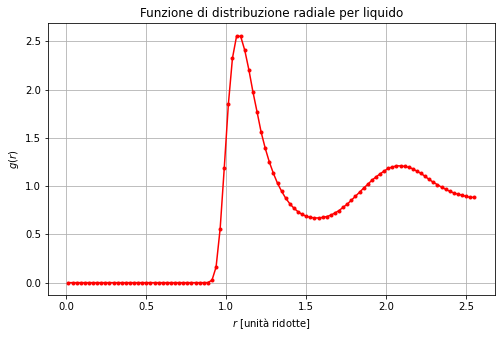

In [53]:
plt.figure(figsize=(8,5))
r = np.loadtxt("output.gave_liquid.0", usecols=0)
g = np.loadtxt("output.gave_liquid.0", usecols=1)
err_g = np.loadtxt("output.gave_liquid.0", usecols=2)

plt.errorbar(r,g,yerr=err_g, color='red', marker='.')
plt.xlabel('$r$ [unità ridotte]')
plt.ylabel('$g(r)$')
plt.title("Funzione di distribuzione radiale per liquido")
plt.grid(True)
plt.show()

Anche per il liquido di osserva l'effetto del core repulsivo. Le particelle sono separate da distanze maggiori che nel solido e la funzione $g(r)$ tende al valore $1$ avvicinandosi alla fine del box di simulazione, segnalando che le particelle a quella distanza tendono a non risentire della particella posta nell'origine e ad assumere un comportamento simile a quello di un gas ideale.

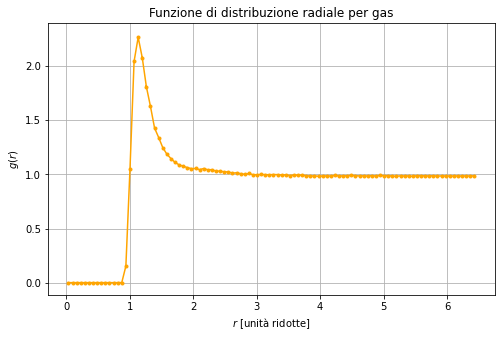

In [54]:
plt.figure(figsize=(8,5))
r = np.loadtxt("output.gave_gas.0", usecols=0)
g = np.loadtxt("output.gave_gas.0", usecols=1)
err_g = np.loadtxt("output.gave_gas.0", usecols=2)

plt.errorbar(r,g,yerr=err_g, color='orange', marker='.')
plt.xlabel('$r$ [unità ridotte]')
plt.ylabel('$g(r)$')
plt.title("Funzione di distribuzione radiale per gas")
plt.grid(True)
plt.show()

Nel gas le particelle sono ancora più indipendenti tra di loro.

### Esercizio 7.3

Si include il calcolo di $g(r)$ all'interno del codice di dinamica molecolare dell'esercitazione $4$.

### Esercizio 7.4

#### Svolgimento

Vengono simulate fase solida, liquida e gassosa dell'argon e si valutano $U/N$, $P$ e $g(r)$. Si confrontano i risultati di $U/N$ e $g(r)$ con quelli ottenuti attraverso il codice di dinamica molecolare. Al codice di dinamica molecolare si aggiungono anche le *tail corrections* all'energia potenziale per un confronto migliore.

Le simulazioni con il codice Monte Carlo NVT sono eseguite con $100$ blocchi e $5000$ step per blocco, quelle con il codice di dinamica molecolare con $100$ blocchi da $1000$ step per blocco.

In [3]:
epsilon_on_kB = 120
epsilon = 1.6567788 * 10**(-21)
sigma = 0.34*10**(-9)

#### Risultati

##### Fase solida

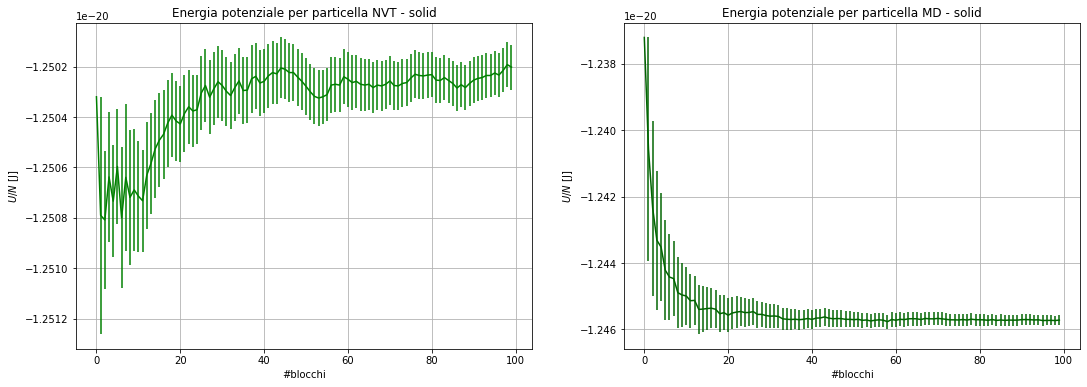

In [8]:
x=np.arange(100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
epot = np.loadtxt("output.epot_solid.0", usecols=2)*epsilon
err_epot = np.loadtxt("output.epot_solid.0", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='green')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella NVT - solid")
ax.grid(True)

ax=ax2
epot = np.loadtxt("ave_epot_solid.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_solid.out", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='darkgreen')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella MD - solid")
ax.grid(True)

I risultati ottenuti con i due metodi sono molto simili. Le incertezze ottenute con la dinamica molecolare sono maggiori, avendo utilizzato una taglia del blocco minore.

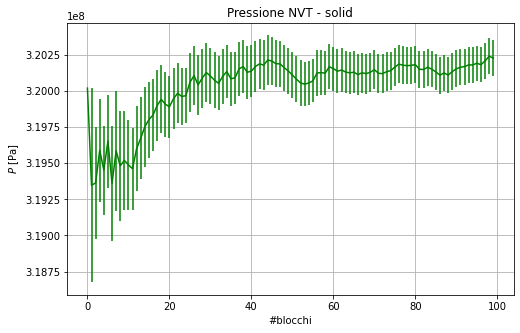

In [72]:
plt.figure(figsize=(8,5))
pres = np.loadtxt("output.pres_solid.0", usecols=2)*epsilon/sigma**3
err_pres = np.loadtxt("output.pres_solid.0", usecols=3)*epsilon/sigma**3

plt.errorbar(x,pres,yerr=err_pres, color='green')
plt.xlabel('#blocchi')
plt.ylabel('$P$ [Pa]')
plt.title("Pressione NVT - solid")
plt.grid(True)
plt.show()

Le pressioni all'interno dei solidi le cui particelle interagiscono tramite potenziali di Lennard-Jones sono dell'ordine dei decimi di GPa.

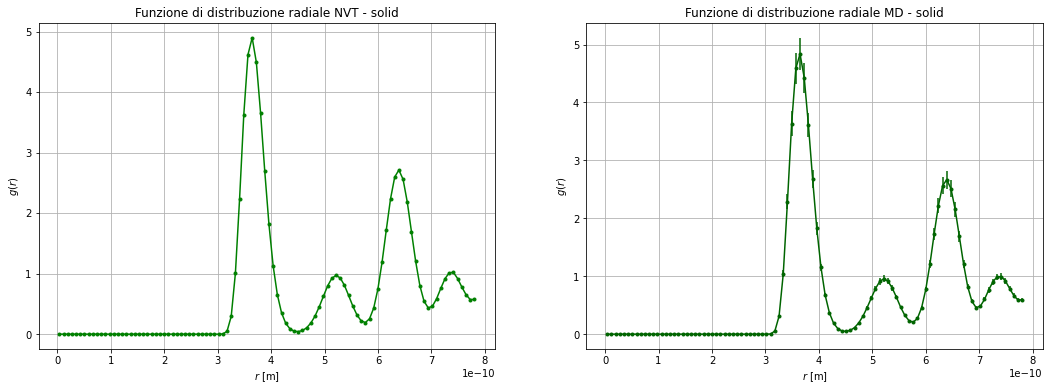

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
r = np.loadtxt("output.gave_solid2.0", usecols=0)*sigma
g = np.loadtxt("output.gave_solid2.0", usecols=1)
err_g = np.loadtxt("output.gave_solid2.0", usecols=2)
ax.errorbar(r,g,yerr=err_g, color='green', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale NVT - solid")
ax.grid(True)

ax=ax2
r = np.loadtxt("ave_g_solid.out", usecols=0)*sigma
g = np.loadtxt("ave_g_solid.out", usecols=1)/5000
err_g = np.loadtxt("ave_g_solid.out", usecols=2)/5000
ax.errorbar(r,g,yerr=err_g, color='darkgreen', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale MD - solid")
ax.grid(True)

La funzione di distribuzione radiale ottenuta simulando il sistema in *ensemble* canonico è molto simile a quella ottenuta per l'*ensemble* microcanonico, a parte le maggiori incertezze che si hanno sui dati di quest'ultimo. Si riconoscono alle stesse distanze le shell dei primi, secondi, terzi e quarti vicini.

##### Fase liquida

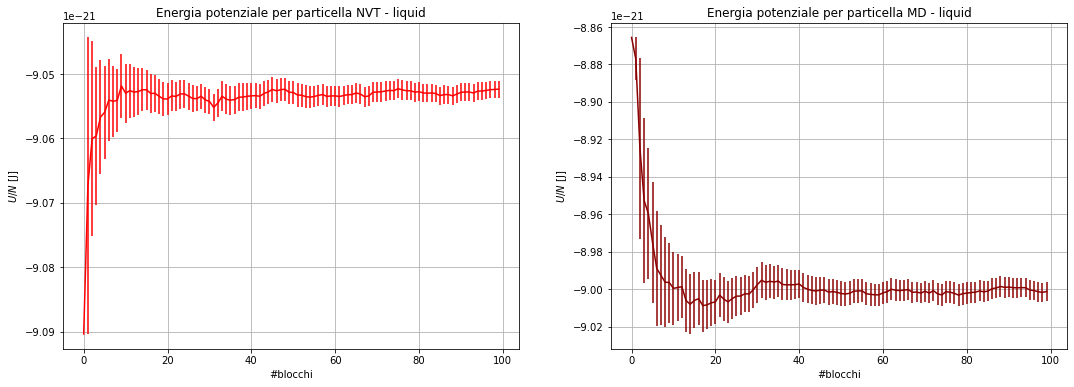

In [10]:
x=np.arange(100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
epot = np.loadtxt("output.epot_liquid.0", usecols=2)*epsilon
err_epot = np.loadtxt("output.epot_liquid.0", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='red')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella NVT - liquid")
ax.grid(True)

ax=ax2
epot = np.loadtxt("ave_epot_liquid.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_liquid.out", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='darkred')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella MD - liquid")
ax.grid(True)

Anche nel caso di sistema liquido i risultati ottenuti con i due metodi sono confrontabili.

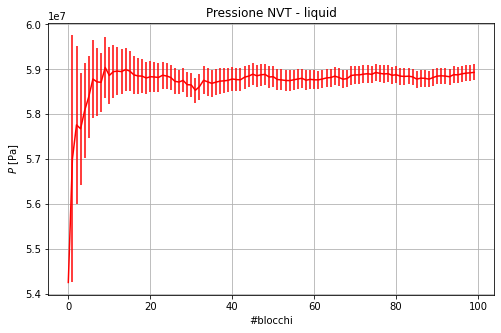

In [71]:
plt.figure(figsize=(8,5))
pres = np.loadtxt("output.pres_liquid.0", usecols=2)*epsilon/sigma**3
err_pres = np.loadtxt("output.pres_liquid.0", usecols=3)*epsilon/sigma**3

plt.errorbar(x,pres,yerr=err_pres, color='red')
plt.xlabel('#blocchi')
plt.ylabel('$P$ [Pa]')
plt.title("Pressione NVT - liquid")
plt.grid(True)
plt.show()

La pressione è minore rispetto a quella del solido, essendo la pressione dipendente dalla densità, maggiore nel solido, e da potenze negative della distanza tra le particelle, distanza che è maggiore nel liquido.  

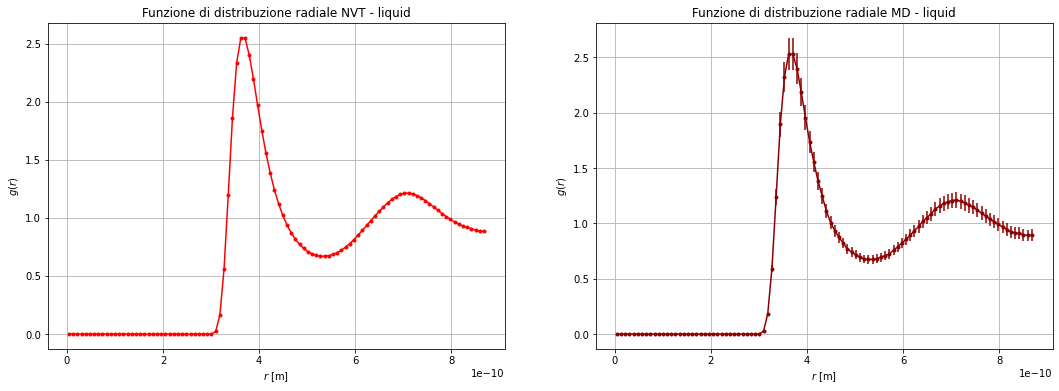

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
r = np.loadtxt("output.gave_liquid2.0", usecols=0)*sigma
g = np.loadtxt("output.gave_liquid2.0", usecols=1)
err_g = np.loadtxt("output.gave_liquid2.0", usecols=2)
ax.errorbar(r,g,yerr=err_g, color='red', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale NVT - liquid")
ax.grid(True)

ax=ax2
r = np.loadtxt("ave_g_liquid.out", usecols=0)*sigma
g = np.loadtxt("ave_g_liquid.out", usecols=1)/5000
err_g = np.loadtxt("ave_g_liquid.out", usecols=2)/5000
ax.errorbar(r,g,yerr=err_g, color='darkred', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale MD - liquid")
ax.grid(True)

Funzioni di distribuzione radiale paragonabili con i due metodi.

##### Fase gassosa

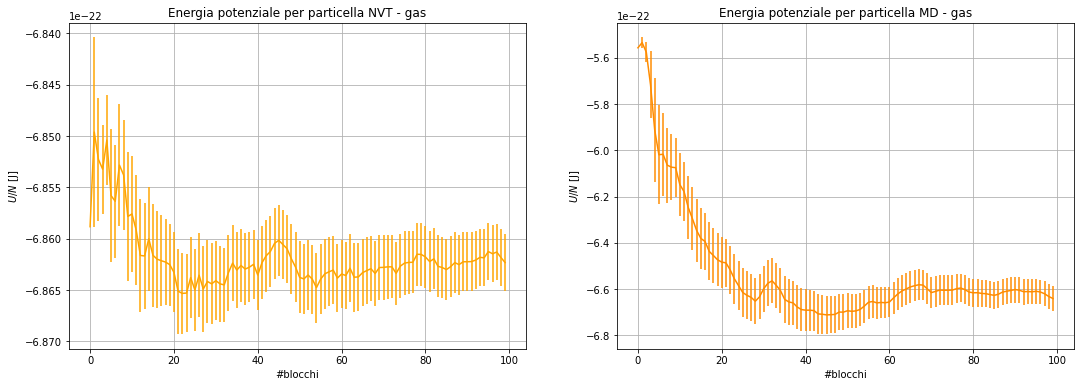

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
epot = np.loadtxt("output.epot_gas.0", usecols=2)*epsilon
err_epot = np.loadtxt("output.epot_gas.0", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='orange')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella NVT - gas")
ax.grid(True)

ax=ax2
epot = np.loadtxt("ave_epot_gas.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_gas.out", usecols=3)*epsilon
ax.errorbar(x,epot,yerr=err_epot, color='darkorange')
ax.set_xlabel('#blocchi')
ax.set_ylabel(r'$U/N$ [J]')
ax.set_title("Energia potenziale per particella MD - gas")
ax.grid(True)

Le energie potenziali per particella nel gas sono abbastanza vicine.

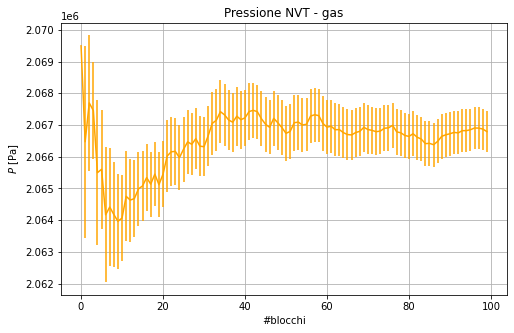

In [74]:
plt.figure(figsize=(8,5))
pres = np.loadtxt("output.pres_gas.0", usecols=2)*epsilon/sigma**3
err_pres = np.loadtxt("output.pres_gas.0", usecols=3)*epsilon/sigma**3

plt.errorbar(x,pres,yerr=err_pres, color='orange')
plt.xlabel('#blocchi')
plt.ylabel('$P$ [Pa]')
plt.title("Pressione NVT - gas")
plt.grid(True)
plt.show()

Come atteso, la pressione è minore di quella di solido e liquido.

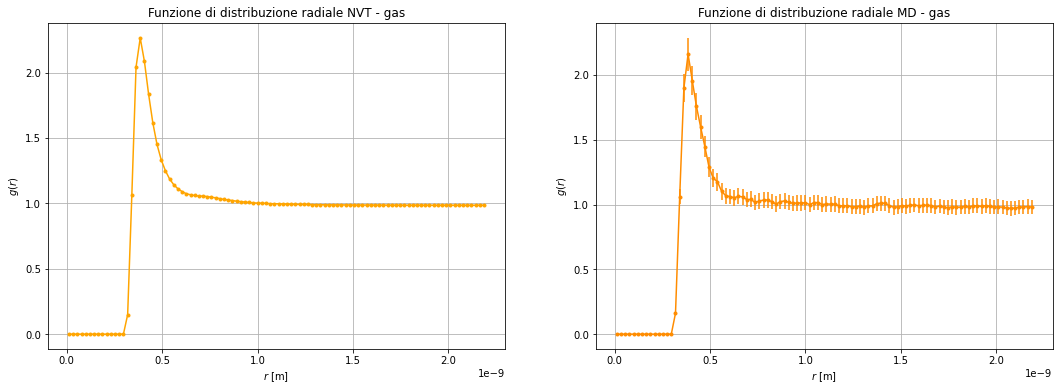

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax=ax1
r = np.loadtxt("output.gave_gas2.0", usecols=0)*sigma
g = np.loadtxt("output.gave_gas2.0", usecols=1)
err_g = np.loadtxt("output.gave_gas2.0", usecols=2)
ax.errorbar(r,g,yerr=err_g, color='orange', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale NVT - gas")
ax.grid(True)

ax=ax2
r = np.loadtxt("ave_g_gas.out", usecols=0)*sigma
g = np.loadtxt("ave_g_gas.out", usecols=1)/5000
err_g = np.loadtxt("ave_g_gas.out", usecols=2)/5000
ax.errorbar(r,g,yerr=err_g, color='darkorange', marker='.')
ax.set_xlabel('$r$ [m]')
ax.set_ylabel('$g(r)$')
ax.set_title("Funzione di distribuzione radiale MD - gas")
ax.grid(True)

Le funzioni di distribuzione radiale sono molto simili.